<a href="https://colab.research.google.com/github/RedSafir/PCD-UTS/blob/main/Konvolusi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Konvolusi</h1>

In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

<h1>Load Gambar</h1>

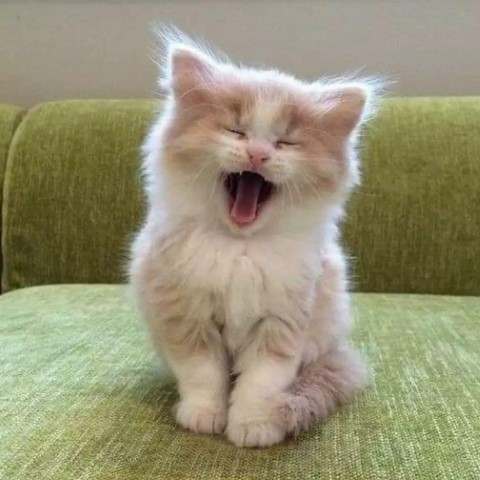

In [4]:
img = cv2.imread("dumy-img-1.jpg")
cv2_imshow(img)

<h1>fungsi konvolusi secara general</h1>

In [8]:
img = cv2.imread("dumy-img-1.jpg")
kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

<h3>Terdapat beberapa alternative dalam menggunakan fungsi konvolusi</h3>

<h3>Cara utama</h3>

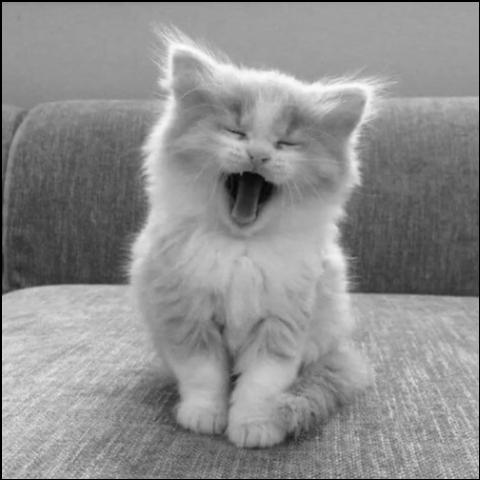

In [21]:
img = cv2.imread("dumy-img-1.jpg", 0)
kernel = np.array([[1/4, 1/4],
                   [1/4, 1/4]])

H_img, W_img = img.shape

H_kernel, W_kernel = kernel.shape

H = H_kernel // 2
W = W_kernel // 2

hasil = np.zeros((H_img, W_img))

for i in range(H + 1, H_img - H):
  for j in range(W + 1, W_img - W):
    sum = 0
    for k in range(-H, H):
      for l in range(-W, W):
        citra_value = img[i + k, j + l]
        kernel_value = kernel[H + k, W + l]
        sum += citra_value * kernel_value
      hasil[i, j] = sum

image_konvolusi = hasil

cv2_imshow(image_konvolusi)

<h3>Alternative</h3>

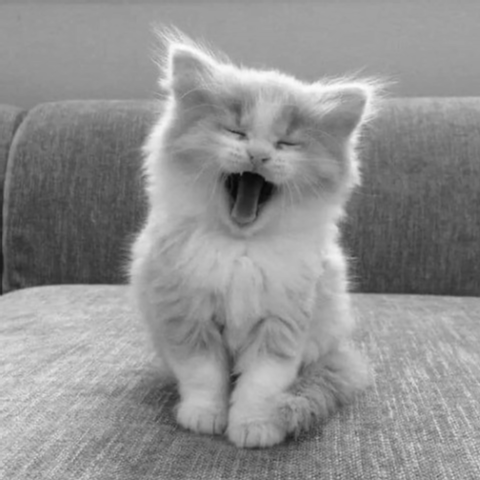

In [2]:
img = cv2.imread('dumy-img-1.jpg', 0)

kernel = np.array([[1/4, 1/4],
                   [1/4, 1/4]])

hasil_kernel = cv2.filter2D(img, -1, kernel)

cv2_imshow(hasil_kernel)

<h1>terdapat beberapa operasi dalam konvolusi</h1>
<ol>
  <li>lowpass
    <ol>
      <li>mean filter</li>
      <li>smoothing filter</li>
      <li>median filter</li>
    </ol>
  </li>
  <li>Highpass
    <ol>
      <li>Edge Detection</li>
    </ol>
  </li>
  <li>max filter</li>
  <li>min filter</li>
<ol>

<h1>LowPass</h1>

<h1>1.1 mean Filter</h1>

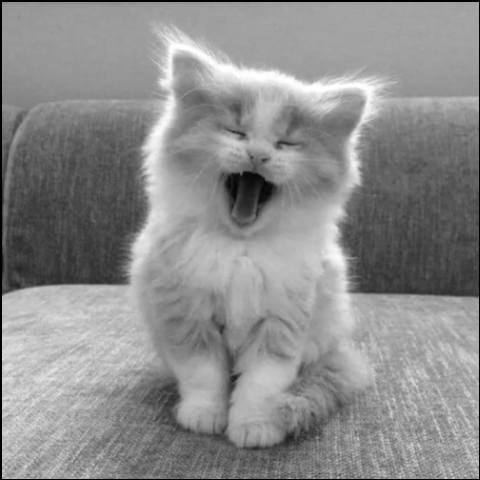

In [22]:
img = cv2.imread("dumy-img-1.jpg")

H, W = img.shape[:2]

grey_img = np.zeros((H, W))

for i in range(H):
  for j in range(W):
    grey_img[i, j] = np.clip(0.299 * img[i, j, 0] + 
                            0.587 * img[i, j, 1] +
                            0.144 * img[i, j, 2], 0, 255)

kernel = np.array([[1/4, 1/4],
                   [1/4, 1/4]])

W_kernel, H_kernel = kernel.shape
W_citra, H_citra = grey_img.shape

W = W_kernel // 2
H = H_kernel // 2

hasil = np.zeros((H_citra, W_citra))

for i in range(H + 1, H_citra - H):
  for j in range(W + 1, W_citra - W):
    sum = 0
    for k in range(-H, H):
      for l in range(-W, W):
        citra_value = grey_img[i + k, j + l]
        kernel_value = kernel[H + k, W + l]
        sum += citra_value * kernel_value
    hasil[i, j] = sum

  
img_hasil = hasil

cv2_imshow(img_hasil)

<h1>1.2 smoothing filter</h1>

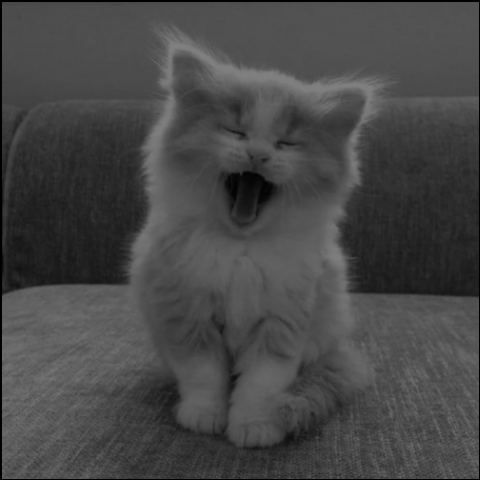

In [39]:
img = cv2.imread("dumy-img-1.jpg")

H, W = img.shape[:2]

grey_img = np.zeros((H, W))

for i in range(H):
  for j in range(W):
    grey_img[i, j] = np.clip(0.299 * img[i, j, 0] +
                             0.587 * img[i, j, 1] +
                             0.155 * img[i, j, 2], 0, 255)

kernel = np.array([[1/10, 1/10, 1/10],
                    [1/10, 1/5, 1/10],
                    [1/10, 1/10, 1/10]])

W_citra, W_citra = grey_img.shape
W_kernel, H_kernel = kernel.shape

H = H_kernel // 2
W = W_kernel // 2

hasil = np.zeros((H_citra, W_citra))

for i in range(H + 1, H_citra - H):
  for j in range(W + 1, W_citra - W):
    sum = 0
    for k in range(-H, H):
      for l in range(-W, W):
        citra_value = grey_img[i + k, j + l]
        kernel_value = kernel[H + k, W + l]
        sum += citra_value * kernel_value
    hasil[i, j] = sum

img_hasil = hasil

cv2_imshow(hasil)

<h1>1.3 Median Filter</h1>

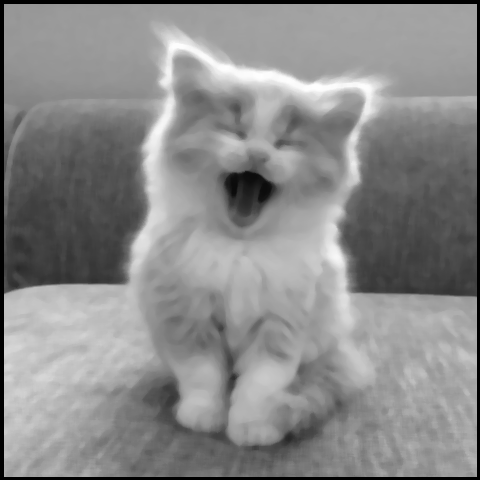

In [41]:
img = cv2.imread("dumy-img-1.jpg")

H, W = img.shape[:2]

grey_img = np.zeros((H, W))

for i in range(H):
  for j in range(W):
    grey_img[i, j] = np.clip(0.299 * img[i, j, 0] +
                             0.587 * img[i, j, 1] +
                             0.144 * img[i, j, 2], 0, 255)

H_image, W_image = grey_img.shape

hasil = np.zeros((H, W))

for i in range(3 + 1, H_image - 3):
  for j in range(3 + 1, W_image - 3):
    neighbor = []
    for k in range(-3, 4):
      for l in range(-3, 4):
        a = grey_img[i + k, j + l]
        neighbor.append(a)
    neighbor.sort()
    hasil[i, j] = neighbor[24]

cv2_imshow(hasil)

<h1>HighPass filter</h1>

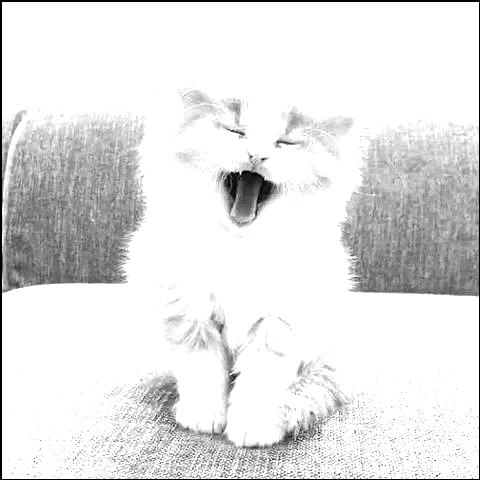

In [47]:
img = cv2.imread("dumy-img-1.jpg")

H, W = img.shape[:2]

grey = np.zeros((H,W))

for i in range(H):
  for j in range(W):
    grey[i, j] = np.clip(0.299 * img[i, j, 0] +
                         0.587 * img[i, j, 1] +
                         0.144 * img[i, j, 2], 0, 255)

kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

H_citra, W_citra = img.shape[:2]
H_kernel, W_kernel = kernel.shape[:2]

H = H_kernel // 2
W = W_kernel // 2

hasil = np.zeros((H_citra, W_citra))

for i in range(H + 1, H_citra - H):
  for j in range(W + 1, W_citra - W):
    sum = 0
    for k in range(-H, H):
      for l in range(-W, W):
        citra_value = grey_img[i + k, j + l]
        kernel_value = kernel[H + k, W + l]
        sum += citra_value * kernel_value
    hasil[i, j] = sum
  
img_hasil = hasil

cv2_imshow(img_hasil)